# Simple Linier regresion | Prediksi jumlah penduduk kota malang

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
path_file = 'data/data merge.xlsx'

## Read data

In [9]:
# dp_km = data pennduduk kota malang
dp_km = pd.read_excel(path_file)

In [10]:
dp_km

,Tahun,Jumlah
0,2000,756982
1,2001,764684
2,2002,772642
3,2003,780863
4,2004,789349
5,2005,798104
6,2006,807136
7,2007,816444
8,2008,816637
9,2009,820857


In [11]:
dp_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Tahun   24 non-null     int64
 1   Jumlah  24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


Text(0, 0.5, 'jumlah')

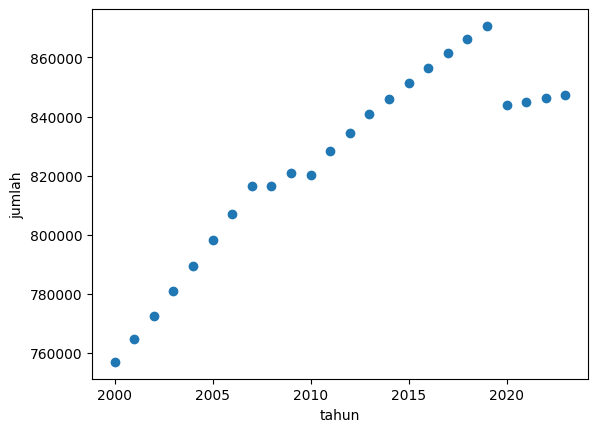

In [17]:
plt.scatter(x=dp_km['Tahun'],y=dp_km['Jumlah'])
plt.xlabel('tahun')
plt.ylabel('jumlah')

## Independen variable

In [24]:
x = dp_km.iloc[:,[0]].values
y = dp_km.iloc[:,[1]].values

## split test trining

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

## Training regresi dan predisksi

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg=LinearRegression()

In [65]:
reg.fit(x_train,y_train)

LinearRegression()

In [66]:
y_predict = reg.predict(x_test)
y_predict

array([[824021.16666667],
       [819541.28159558],
       [873299.90244866],
       [837460.82187994],
       [864340.13230648],
       [779222.31595577]])

In [67]:
from sklearn.metrics import mean_absolute_error,r2_score


In [68]:
print('MAE :', mean_absolute_error(y_test,y_predict))
print('R2 :', r2_score(y_test,y_predict))

MAE : 12654.346761453276
R2 : 0.7019594780435011


In [70]:
dp_pred = pd.read_excel('data/data prediksi.xlsx')
dp_pred

,tahun
0,2024
1,2025
2,2026


In [71]:
prediksi_baru = reg.predict(dp_pred)
prediksi_baru

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[882259.67259084],
       [886739.55766193],
       [891219.44273302]])

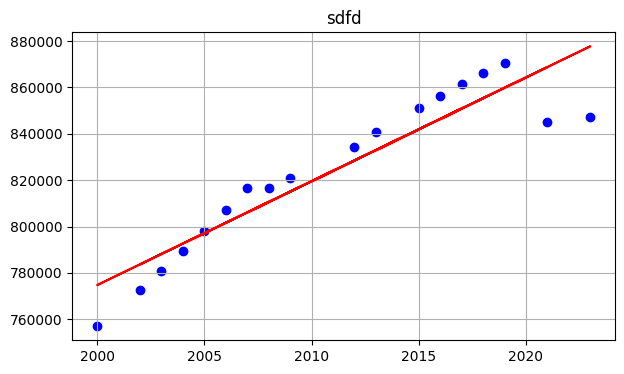

In [78]:
plt.figure(figsize=(7,4))
plt.title('sdfd')
plt.scatter(x_train,y_train,c='blue')


plt.plot(x_train,reg.predict(x_train),c='red')
plt.grid()

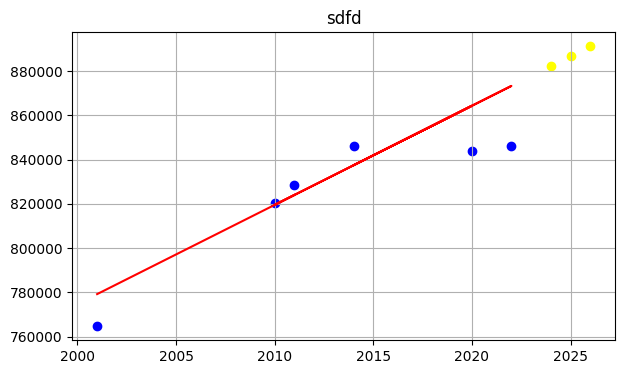

In [79]:
plt.figure(figsize=(7,4))
plt.title('sdfd')
plt.scatter(x_test,y_test,c='blue')


plt.plot(x_test,y_predict,c='red')


plt.scatter(dp_pred,prediksi_baru,c='yellow')

plt.grid()